# 2. Clustering_Campaign

In [1]:
from google.colab import files
import io
import pandas as pd

# Upload file
uploaded = files.upload()

# Ambil nama file pertama
filename = list(uploaded.keys())[0]

# Membaca file dengan pemisah tab
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep='\t')

# Tampilkan 5 baris awal
df.head()

Saving clusteringcampaign.csv to clusteringcampaign.csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
## Tampilkan ringkasan informasi
df.info()

# Hapus kolom yang tidak relevan untuk clustering (contoh: ID, Dt_Customer)
df = df.drop(['ID', 'Dt_Customer'], axis=1)

# Hapus baris dengan nilai kosong
df = df.dropna()

# Mengubah kolom kategorikal ke numerik (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Standarisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)

# Menampilkan hasil standarisasi
scaled_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-1.007246,-0.444062,1.899228,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056


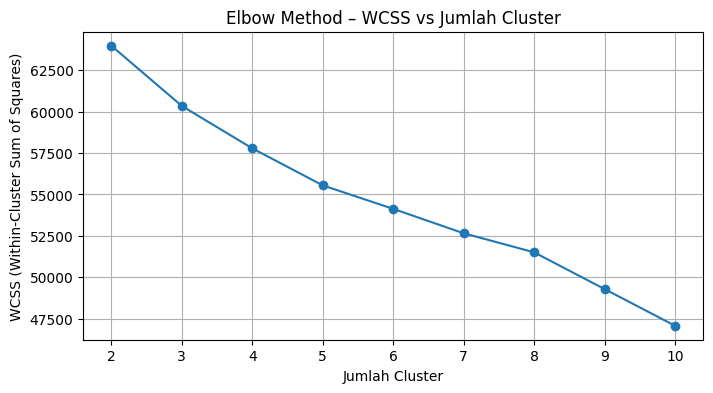

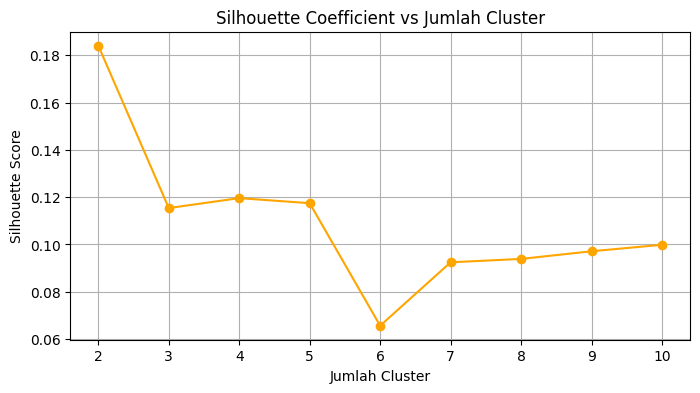

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inisialisasi variabel untuk menyimpan skor evaluasi
wcss = []                # Within Cluster Sum of Squares
silhouette_scores = []   # Silhouette Coefficient

# Evaluasi untuk jumlah cluster 2 sampai 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method – WCSS vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Coefficient vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [4]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Jumlah cluster optimal dipilih berdasarkan grafik sebelumnya
optimal_k = 4  # Ubah jika hasil Elbow/Silhouette menunjukkan jumlah lain
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)
kmeans_labels = kmeans.labels_

# Fungsi untuk evaluasi metrik clustering
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    return silhouette, calinski, davies

# Evaluasi model KMeans
sil_k, ch_k, db_k = evaluate_clustering(scaled_df, kmeans_labels)

# Menampilkan hasil evaluasi
print(f"[KMeans] Silhouette Score         : {sil_k}")
print(f"[KMeans] Calinski-Harabasz Index : {ch_k}")
print(f"[KMeans] Davies-Bouldin Index    : {db_k}")

[KMeans] Silhouette Score         : 0.11960163204823512
[KMeans] Calinski-Harabasz Index : 223.9759238586149
[KMeans] Davies-Bouldin Index    : 2.5775843212182856


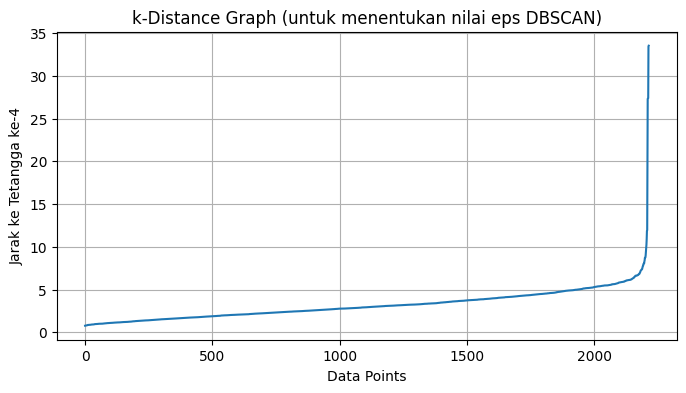

[DBSCAN] Silhouette Score         : -0.20738020006801913
[DBSCAN] Calinski-Harabasz Index : 8.486037628208628
[DBSCAN] Davies-Bouldin Index    : 1.5567398565376922


In [5]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Menentukan nilai eps menggunakan k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

# Plot k-distance graph
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-Distance Graph (untuk menentukan nilai eps DBSCAN)")
plt.xlabel("Data Points")
plt.ylabel("Jarak ke Tetangga ke-4")
plt.grid(True)
plt.show()

# Latih model DBSCAN (nilai eps asumsi awal, sesuaikan dari grafik di atas)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(scaled_df)
dbscan_labels = dbscan.labels_

# Evaluasi model DBSCAN
sil_d, ch_d, db_d = evaluate_clustering(scaled_df, dbscan_labels)

# Menampilkan hasil evaluasi
print(f"[DBSCAN] Silhouette Score         : {sil_d}")
print(f"[DBSCAN] Calinski-Harabasz Index : {ch_d}")
print(f"[DBSCAN] Davies-Bouldin Index    : {db_d}")

In [6]:
# Menyusun hasil evaluasi dalam bentuk DataFrame
comparison = pd.DataFrame({
    "Model": ["KMeans", "DBSCAN"],
    "Silhouette Score": [sil_k, sil_d],
    "Calinski-Harabasz Index": [ch_k, ch_d],
    "Davies-Bouldin Index": [db_k, db_d]
})

# Tampilkan perbandingan metrik evaluasi
print("Perbandingan Hasil Clustering Berdasarkan Berbagai Metrik:")
display(comparison)

Perbandingan Hasil Clustering Berdasarkan Berbagai Metrik:


,Model,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,0.119602,223.975924,2.577584
1,DBSCAN,-0.207380,8.486038,1.556740


In [7]:
from scipy.spatial.distance import cdist

# Fungsi untuk menghitung Dunn Index
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) < 2:
        return -1  # Tidak bisa dihitung jika hanya ada satu cluster atau semua noise

    # Intra-cluster distances (diameter)
    intra_dists = []
    for cluster in unique_clusters:
        if cluster == -1:  # Lewati noise (DBSCAN)
            continue
        points = X[labels == cluster]
        if len(points) > 1:
            intra = np.max(cdist(points, points))
            intra_dists.append(intra)

    # Inter-cluster distances (jarak antar centroid)
    inter_dists = []
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            if unique_clusters[i] == -1 or unique_clusters[j] == -1:
                continue  # Lewati noise
            points_i = X[labels == unique_clusters[i]]
            points_j = X[labels == unique_clusters[j]]
            dist = np.min(cdist(points_i, points_j))
            inter_dists.append(dist)

    # Dunn Index = min(inter-cluster distance) / max(intra-cluster distance)
    if intra_dists and inter_dists:
        return np.min(inter_dists) / np.max(intra_dists)
    else:
        return -1

# Hitung Dunn Index untuk KMeans dan DBSCAN
dunn_kmeans = dunn_index(scaled_df.values, kmeans_labels)
dunn_dbscan = dunn_index(scaled_df.values, dbscan_labels)

print(f"[KMeans] Dunn Index  : {dunn_kmeans}")
print(f"[DBSCAN] Dunn Index  : {dunn_dbscan}")

[KMeans] Dunn Index  : 0.020989555244396937
[DBSCAN] Dunn Index  : 0.3531685387813725


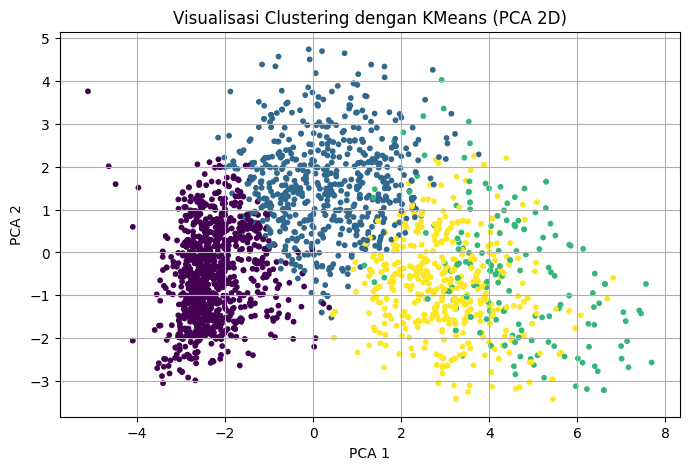

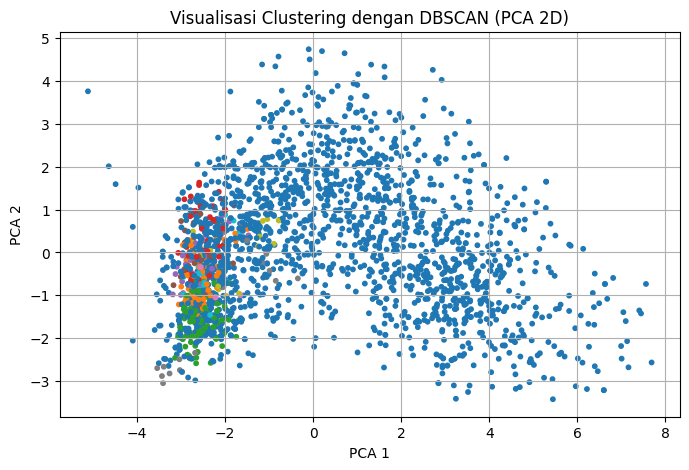

In [8]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Visualisasi KMeans
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("Visualisasi Clustering dengan KMeans (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# Visualisasi DBSCAN
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='tab10', s=10)
plt.title("Visualisasi Clustering dengan DBSCAN (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [9]:
# Tambahkan Dunn Index ke perbandingan
comparison["Dunn Index"] = [dunn_kmeans, dunn_dbscan]

# Tampilkan kembali tabel perbandingan lengkap
print("Perbandingan Model Clustering (Lengkap):")
display(comparison)

Perbandingan Model Clustering (Lengkap):


,Model,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index,Dunn Index
0,KMeans,0.119602,223.975924,2.577584,0.020990
1,DBSCAN,-0.207380,8.486038,1.556740,0.353169


# Penjelasan Metrik Evaluasi Clustering
1. Silhouette Coefficient

Silhouette Coefficient mengukur seberapa mirip suatu titik dengan kluster sendiri dibandingkan dengan kluster lainnya.

$ s = \frac{b - a}{\max(a, b)} $

-  $a$ :  Rata-rata jarak antara titik dengan semua titik dalam klusternya.
-  $b$ : Rata-rata jarak antara titik tersebut dengan titik-titik pada kluster terdekat lainnya.
- Nilai  $s$  berada pada rentang [-1, 1]. Semakin mendekati 1, semakin baik.

2. Calinski-Harabasz Index

Indeks ini merupakan rasio antara dispersi antar-kluster dengan dispersi dalam-kluster.

$CH = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}$

- $ \text{Tr}(B_k) $ : Trace dari matriks scatter antar-kluster (between-cluster dispersion matrix).
- $\text{Tr}(W_k) $: Trace dari matriks scatter dalam-kluster (within-cluster dispersion matrix).
-  $n$ : Jumlah total data.
-  $k$ : Jumlah kluster.

Semakin besar nilai $ CH $, semakin baik kualitas pemisahan kluster.

3. Davies-Bouldin Index

Indeks ini mengukur rata-rata dari rasio antara jarak dalam-kluster dengan jarak antar-kluster.

$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)$

- $ s_i $: Rata-rata jarak dalam kluster i .
- $ d_{ij} $: Jarak antara pusat kluster i dan j .
- $ k $: Jumlah kluster.

4. Dunn Index

Dunn Index mencari perbandingan antara jarak antar-kluster terkecil dan diameter kluster terbesar.

$D = \frac{\min_{1 \leq i < j \leq k} d(C_i, C_j)}{\max_{1 \leq l \leq k} \delta(C_l)}$

- $d(C_i, C_j) $: Jarak minimum antar dua kluster $ i $ dan $ j $.
- $ \delta(C_l) $: Diameter maksimum dari kluster $ l $.
- $ k $: Jumlah kluster.

Semakin besar nilai Dunn Index, maka kluster lebih terpisah dengan baik dan kompak secara internal.

# Kesimpulan
- Jika jumlah kluster diketahui sebelumnya dan cluster terdistribusi seimbang, maka Silhouette Score dan CH Index cenderung stabil.

- Jika data mengandung outlier atau noise seperti DBSCAN, maka Dunn Index dan Davies-Bouldin cenderung lebih sensitif.

- Berdasarkan hasil yang diperoleh, metrik terbaik adalah yang paling konsisten menilai performa model secara objektif (misal: Silhouette + CH tinggi, DB rendah).